In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from torch.nn.utils import parameters_to_vector, vector_to_parameters

In [4]:
torch.manual_seed(1)

In [5]:
# MNIST dataset 
train_dataset = torchvision.datasets.MNIST(root='./data', 
                                           train=True, 
                                           transform=transforms.ToTensor(),  
                                           download=False)

test_dataset = torchvision.datasets.MNIST(root='./data', 
                                          train=False, 
                                          transform=transforms.ToTensor())

print("train_dataset size:", len(train_dataset),"\ntest_dataset size:", len(test_dataset))

train_dataset size: 60000 
test_dataset size: 10000


In [6]:
# Data loader 1
m1train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=64, 
                                           shuffle=True)

m1test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=100, 
                                          shuffle=False)

In [7]:
# Data loader 2
m2train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=1000, 
                                           shuffle=True)

m2test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=100, 
                                          shuffle=False)

In [8]:
class M1(nn.Module):
    def __init__(self,):
        super(M1, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size) #1st Convolution
        self.pool = nn.MaxPool2d(2, 2)   #pool_size=2, strides=2 
        self.conv2 = nn.Conv2d(10, 20, kernel_size) #2nd Convolution
        self.fc1 = nn.Linear(320, 50) #((I/P - Filter + 2*Pad)/Stride)+1 
        self.dropout = nn.Dropout(dropout)
        self.fc2 = nn.Linear(50, 100)
        self.fc3 = nn.Linear(100, 10)

    def forward(self, x):
        # -> n, 3, 32, 32
        x = self.pool(F.relu(self.conv1(x)))  
        x = self.pool(F.relu(self.conv2(x)))  
        x = x.view(-1, 320)            #Flattening 
        x = F.relu(self.fc1(x))        #Fully Connected NN   
        x = self.dropout(x)   
        x = F.relu(self.fc2(x))        #Fully Connected NN           
        x = self.fc3(x)                #O/P Layer       
        return x

In [9]:
#train function
def trainFunc(model,num_epochs,train_loader):
    print('strated')
    n_total_steps = len(train_loader)
    train_losses = []
    train_epoch = []
    train_acc = []
    not_converged =True
    epoch = 0
    while not_converged:
        epoch += 1
        n_correct = 0
        n_samples = 0
        for i, (images, labels) in enumerate(train_loader):  
            if (i+1)% 60 == 0 : print(i+1)
            
            # Forward pass
            prediction = model(images)
            loss = loss_func(prediction, labels)
            # Backward and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            _, predicted = torch.max(prediction.data, 1)
            n_samples += labels.size(0)
            n_correct += (predicted == labels).sum().item()
            acc = 100.0 * n_correct / n_samples

            if (i+1) % 60 == 0:
                print (f'Epoch [{epoch}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')
                train_epoch.append(epoch)
                train_losses.append(loss.item())
                print(f'Epoch [{epoch}/{num_epochs}], Accuracy : {acc} %')
                train_acc.append(acc)

                if epoch == num_epochs:
                        print("Max Epoch Reached")
                        not_converged = False
                elif (epoch > 5) and  (train_losses[-1] < 0.001):
                    if abs(train_losses[-3] - train_losses[-2]) < 1.0e-05 and abs(train_losses[-2] - train_losses[-1]) < 1.0e-05:
                        print("Convergeance reached for loss:",train_losses[-1])
                        not_converged = False
                        
    return train_epoch,train_losses,train_acc

In [10]:
# Hyper-parameters 
input_size = 784 # 28x28
max_epochs = 15
learning_rate = 0.001
kernel_size = 4
weight_decay_val = 1e-4
dropout = 0.25

In [11]:
mBatch1 = M1()
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(mBatch1.parameters(), lr=learning_rate, weight_decay = weight_decay_val)

a=[]
for i in mBatch1.parameters():
    a.append(torch.numel(i))
print(f'Total no of parameters in Model 1 with batch_size={64} is:{np.sum(a)}')

Total no of parameters in Model 1 with batch_size=64 is:25550


In [12]:
B1_train_epoch,B1_train_losses,B1_train_acc = trainFunc(mBatch1,max_epochs,m1train_loader)

strated
60
Epoch [1/15], Step [60/938], Loss: 0.8804
Epoch [1/15], Accuracy : 42.083333333333336 %
120
Epoch [1/15], Step [120/938], Loss: 0.4854
Epoch [1/15], Accuracy : 58.658854166666664 %
180
Epoch [1/15], Step [180/938], Loss: 0.3982
Epoch [1/15], Accuracy : 67.09201388888889 %
240
Epoch [1/15], Step [240/938], Loss: 0.3986
Epoch [1/15], Accuracy : 72.14192708333333 %
300
Epoch [1/15], Step [300/938], Loss: 0.2927
Epoch [1/15], Accuracy : 75.30208333333333 %
360
Epoch [1/15], Step [360/938], Loss: 0.3081
Epoch [1/15], Accuracy : 77.58680555555556 %
420
Epoch [1/15], Step [420/938], Loss: 0.3896
Epoch [1/15], Accuracy : 79.65029761904762 %
480
Epoch [1/15], Step [480/938], Loss: 0.2031
Epoch [1/15], Accuracy : 81.17838541666667 %
540
Epoch [1/15], Step [540/938], Loss: 0.2787
Epoch [1/15], Accuracy : 82.50289351851852 %
600
Epoch [1/15], Step [600/938], Loss: 0.2176
Epoch [1/15], Accuracy : 83.60416666666667 %
660
Epoch [1/15], Step [660/938], Loss: 0.3323
Epoch [1/15], Accuracy : 

In [13]:
batch1_param = torch.nn.utils.parameters_to_vector(mBatch1.parameters())
print(batch1_param,'\nlen:',len(batch1_param))

tensor([ 0.1559,  0.0223, -0.0872,  ...,  0.1141,  0.0110, -0.1040],
       grad_fn=<CatBackward0>) 
len: 25550


In [14]:
mBatch2 = M1()
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(mBatch2.parameters(), lr=learning_rate, weight_decay = weight_decay_val)

a=[]
for i in mBatch2.parameters():
    a.append(torch.numel(i))
print(f'Total no of parameters in Model 2 with batch_size={1024} is:{np.sum(a)}')

Total no of parameters in Model 2 with batch_size=1024 is:25550


In [15]:
B2_train_epoch,B2_train_losses,B2_train_acc = trainFunc(mBatch2,max_epochs,m2train_loader)

strated
60
Epoch [1/15], Step [60/60], Loss: 0.6546
Epoch [1/15], Accuracy : 55.07 %
60
Epoch [2/15], Step [60/60], Loss: 0.3551
Epoch [2/15], Accuracy : 86.2 %
60
Epoch [3/15], Step [60/60], Loss: 0.2597
Epoch [3/15], Accuracy : 90.75166666666667 %
60
Epoch [4/15], Step [60/60], Loss: 0.2117
Epoch [4/15], Accuracy : 93.04166666666667 %
60
Epoch [5/15], Step [60/60], Loss: 0.2109
Epoch [5/15], Accuracy : 94.33 %
60
Epoch [6/15], Step [60/60], Loss: 0.1574
Epoch [6/15], Accuracy : 95.26 %
60
Epoch [7/15], Step [60/60], Loss: 0.1035
Epoch [7/15], Accuracy : 95.82833333333333 %
60
Epoch [8/15], Step [60/60], Loss: 0.1106
Epoch [8/15], Accuracy : 96.19833333333334 %
60
Epoch [9/15], Step [60/60], Loss: 0.1013
Epoch [9/15], Accuracy : 96.55333333333333 %
60
Epoch [10/15], Step [60/60], Loss: 0.1193
Epoch [10/15], Accuracy : 96.78166666666667 %
60
Epoch [11/15], Step [60/60], Loss: 0.1205
Epoch [11/15], Accuracy : 96.89166666666667 %
60
Epoch [12/15], Step [60/60], Loss: 0.0727
Epoch [12/15]

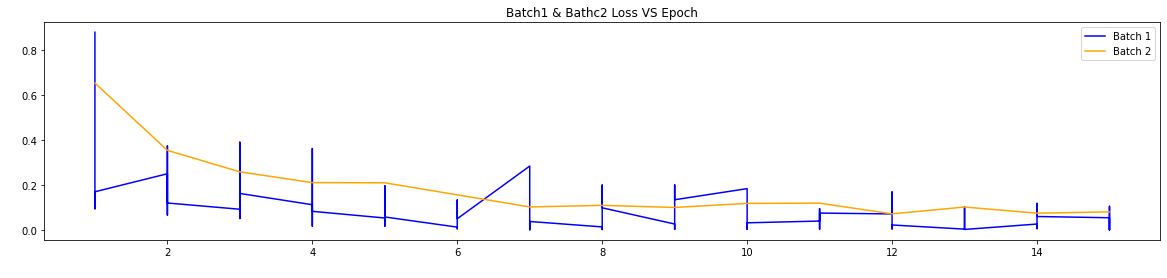

In [40]:
#Plotting Loss plot for both Batch 1 and Batch 2 models
#B2_train_epoch,B2_train_losses,B2_train_acc
plt.figure(figsize=(20, 4))
plt.plot(B1_train_epoch,B1_train_losses,color="blue")
plt.plot(B2_train_epoch,B2_train_losses,color="orange")
plt.title('Batch1 & Bathc2 Loss VS Epoch')
plt.legend(['Batch 1','Batch 2'])
plt.xlabel ('Epoch', color="white")
plt.ylabel ('loss', color="white")
plt.show()

In [42]:
B1_train_losses

[0.8803587555885315,
 0.4854353070259094,
 0.3982457220554352,
 0.3986225128173828,
 0.29269224405288696,
 0.3080838918685913,
 0.38961708545684814,
 0.20308415591716766,
 0.2787364721298218,
 0.21758873760700226,
 0.3322761058807373,
 0.2069367915391922,
 0.0954047292470932,
 0.2551240921020508,
 0.17106911540031433,
 0.2511993646621704,
 0.1343841850757599,
 0.1387263834476471,
 0.3747082054615021,
 0.2082180231809616,
 0.14928480982780457,
 0.0674978718161583,
 0.15526922047138214,
 0.08801790326833725,
 0.17718470096588135,
 0.08239443600177765,
 0.13214612007141113,
 0.10863715410232544,
 0.1137847825884819,
 0.12110236287117004,
 0.09333270788192749,
 0.12969091534614563,
 0.0956137478351593,
 0.20635290443897247,
 0.05234460160136223,
 0.05376746878027916,
 0.2142188847064972,
 0.07461961358785629,
 0.39147093892097473,
 0.058782968670129776,
 0.21505206823349,
 0.19943754374980927,
 0.11097252368927002,
 0.146540105342865,
 0.16354353725910187,
 0.11348669230937958,
 0.09724766

In [16]:
batch2_param = torch.nn.utils.parameters_to_vector(mBatch2.parameters())
print(batch2_param,'\nlen:',len(batch2_param))

tensor([ 0.3929,  0.3047,  0.2116,  ..., -0.0465, -0.0207, -0.0538],
       grad_fn=<CatBackward0>) 
len: 25550


In [17]:
alpha = np.linspace(-2.0, 2.0, num=21)
print(alpha)

[-2.  -1.8 -1.6 -1.4 -1.2 -1.  -0.8 -0.6 -0.4 -0.2  0.   0.2  0.4  0.6
  0.8  1.   1.2  1.4  1.6  1.8  2. ]


In [18]:
thetaArr =[]
for i in range (len(alpha)):
    theta = (1-alpha[i])*batch1_param + alpha[i]*batch2_param
    thetaArr.append(theta)

In [19]:
class ThetaModel(nn.Module):
    def __init__(self,):
        super(ThetaModel, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size) #1st Convolution
        self.pool = nn.MaxPool2d(2, 2)   #pool_size=2, strides=2 
        self.conv2 = nn.Conv2d(10, 20, kernel_size) #2nd Convolution
        self.fc1 = nn.Linear(320, 50) #((I/P - Filter + 2*Pad)/Stride)+1 
        self.dropout = nn.Dropout(dropout)
        self.fc2 = nn.Linear(50, 100)
        self.fc3 = nn.Linear(100, 10)

    def forward(self, x):
        # -> n, 3, 32, 32
        x = self.pool(F.relu(self.conv1(x)))  
        x = self.pool(F.relu(self.conv2(x)))  
        x = x.view(-1, 320)            #Flattening 
        x = F.relu(self.fc1(x))        #Fully Connected NN   
        x = self.dropout(x)   
        x = F.relu(self.fc2(x))        #Fully Connected NN           
        x = self.fc3(x)                #O/P Layer       
        return x

In [23]:
mT1 = ThetaModel()
print(list(mT1.parameters()))

[Parameter containing:
tensor([[[[ 0.1749,  0.1401,  0.0354, -0.0394],
          [ 0.0261, -0.0507, -0.0003, -0.1037],
          [-0.2304,  0.2126,  0.1984,  0.2119],
          [-0.2380, -0.1541,  0.1360, -0.2074]]],


        [[[-0.1243, -0.1807,  0.1552,  0.0601],
          [ 0.0297, -0.0783, -0.1552,  0.0180],
          [-0.1104, -0.0260, -0.1989,  0.0141],
          [-0.2059,  0.2340, -0.1889, -0.0818]]],


        [[[ 0.0332,  0.2159, -0.2215, -0.2327],
          [ 0.0986, -0.0780,  0.0812, -0.0790],
          [ 0.1439,  0.2488,  0.1737, -0.1069],
          [-0.2298,  0.2033,  0.1610, -0.0870]]],


        [[[-0.0910, -0.2244, -0.2077, -0.0398],
          [ 0.0486,  0.0881,  0.1672, -0.2101],
          [ 0.2241, -0.0039,  0.0468, -0.0176],
          [-0.1386,  0.2138,  0.0341, -0.1309]]],


        [[[-0.0168, -0.1868, -0.0700,  0.0189],
          [ 0.0152, -0.0141,  0.1880,  0.1467],
          [-0.2329,  0.1140,  0.1462,  0.0217],
          [-0.0369, -0.1947,  0.0833, -0.2405]]],

In [24]:
#torch.nn.utils.vector_to_parameters(theta1,mT1.parameters())

In [25]:
#print(list(mT1.parameters()))

In [26]:
# mT1 = ThetaModel()
# loss_func = nn.CrossEntropyLoss()
# optimizer = torch.optim.Adam(mT1.parameters(), lr=1e-3, weight_decay = weight_decay_val)

# a=[]
# for i in mT1.parameters():
#     a.append(torch.numel(i))
# print(f'Total no of parameters in Model Theta 1 is:{np.sum(a)}')

In [27]:
#T1_train_epoch,T1_train_losses,T1_train_acc = trainFunc(mT1,max_epochs,m2train_loader)

In [28]:
import copy

In [29]:
modelsTrainArr = []
modelsLossArr = []
modelsAccArr = []

for i in range (len(thetaArr)):
    j=copy.deepcopy(i) 
    theta = (1-alpha[i])*batch1_param + alpha[i]*batch2_param
    j = ThetaModel()
    torch.nn.utils.vector_to_parameters(theta,j.parameters())
    loss_func = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(j.parameters(), lr=1e-3, weight_decay = weight_decay_val)

    a=[]
    for k in j.parameters():
        a.append(torch.numel(k))
    print(f'Total no of parameters in Model Theta {i} is:{np.sum(a)}')

    print(j.parameters)

    T_train_epoch,T_train_losses,T_train_acc = trainFunc(j,max_epochs,m2train_loader)
    
    modelsTrainArr.append(T_train_epoch)
    modelsLossArr.append(T_train_losses)
    modelsAccArr.append(T_train_acc)
    

Total no of parameters in Model Theta 0 is:25550
<bound method Module.parameters of ThetaModel(
  (conv1): Conv2d(1, 10, kernel_size=(4, 4), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(10, 20, kernel_size=(4, 4), stride=(1, 1))
  (fc1): Linear(in_features=320, out_features=50, bias=True)
  (dropout): Dropout(p=0.25, inplace=False)
  (fc2): Linear(in_features=50, out_features=100, bias=True)
  (fc3): Linear(in_features=100, out_features=10, bias=True)
)>
strated
60
Epoch [1/15], Step [60/60], Loss: 17.9412
Epoch [1/15], Accuracy : 89.41166666666666 %
60
Epoch [2/15], Step [60/60], Loss: 6.5040
Epoch [2/15], Accuracy : 95.29 %
60
Epoch [3/15], Step [60/60], Loss: 4.5902
Epoch [3/15], Accuracy : 95.87166666666667 %
60
Epoch [4/15], Step [60/60], Loss: 5.9312
Epoch [4/15], Accuracy : 95.885 %
60
Epoch [5/15], Step [60/60], Loss: 2.3882
Epoch [5/15], Accuracy : 95.925 %
60
Epoch [6/15], Step [60/60], Loss: 1.9596
Epoc

In [43]:
minModelLossArr = []
for i in range (len(modelsLossArr)):
    minModel_loss = np.min(modelsLossArr[i])
    minModelLossArr.append(minModel_loss)


In [44]:
minModelLossArr[0]

0.5339263081550598